In [25]:
import os
import numpy as np
import librosa
from tensorflow import keras
from matplotlib import pyplot

In [19]:
def get_mfcc(wav_file_path):
  y, sr = librosa.load(wav_file_path, offset=10, duration=60)
  mfcc = numpy.array(librosa.feature.mfcc(y=y, sr=sr))
  return mfcc

In [ ]:
example_file = "Data/genres_original/classical/classical.00015.wav"
mfcc = get_mfcc(example_file)
pyplot.imshow(mfcc, interpolation='nearest', aspect='auto')
pyplot.show()

In [20]:
def get_melspectrogram(wav_file_path):
  y, sr = librosa.load(wav_file_path, offset=10, duration=60)
  melspectrogram = numpy.array(librosa.feature.melspectrogram(y=y, sr=sr))
  return melspectrogram

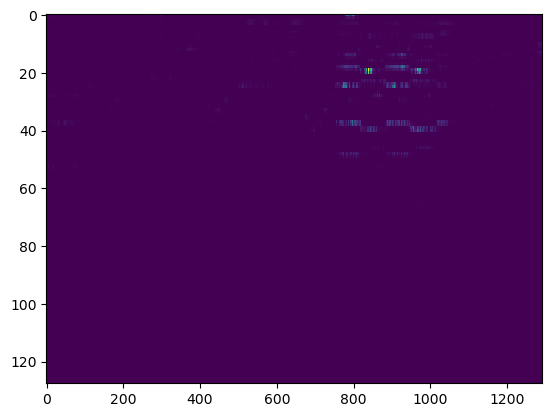

In [8]:
melspectrogram = get_melspectrogram(example_file)
pyplot.imshow(melspectrogram, interpolation='nearest', aspect='auto')
pyplot.show()

In [8]:
def get_chroma_vector(wav_file_path):
  y, sr = librosa.load(wav_file_path)
  chroma = numpy.array(librosa.feature.chroma_stft(y=y, sr=sr))
  return chroma

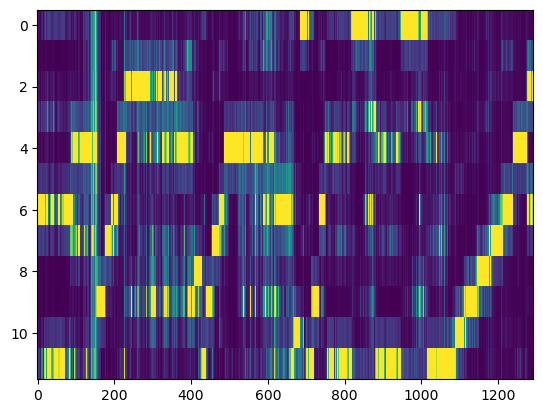

In [10]:
chroma = get_chroma_vector(example_file)
pyplot.imshow(chroma, interpolation='nearest', aspect='auto')
pyplot.show()

In [9]:
def get_tonnetz(wav_file_path):
  y, sr = librosa.load(wav_file_path)
  tonnetz = numpy.array(librosa.feature.tonnetz(y=y, sr=sr))
  return tonnetz

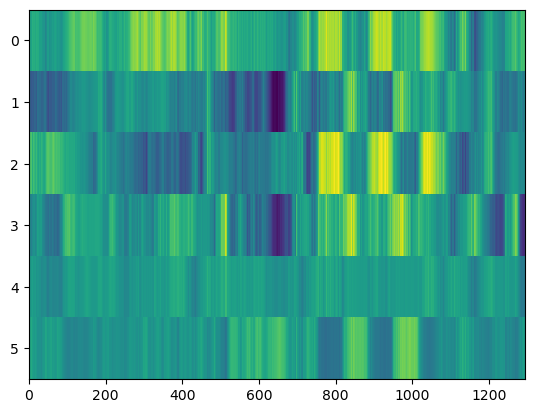

In [12]:
tntz = get_tonnetz(example_file)
pyplot.imshow(tntz , interpolation='nearest', aspect='auto')
pyplot.show()

In [21]:
def get_feature(file_path):
  # Extracting MFCC feature
  mfcc = get_mfcc(file_path)
  mfcc_mean = mfcc.mean(axis=1)
  mfcc_min = mfcc.min(axis=1)
  mfcc_max = mfcc.max(axis=1)
  mfcc_feature = numpy.concatenate( (mfcc_mean, mfcc_min, mfcc_max) )

  # Extracting Mel Spectrogram feature
  melspectrogram = get_melspectrogram(file_path)
  melspectrogram_mean = melspectrogram.mean(axis=1)
  melspectrogram_min = melspectrogram.min(axis=1)
  melspectrogram_max = melspectrogram.max(axis=1)
  melspectrogram_feature = numpy.concatenate( (melspectrogram_mean, melspectrogram_min, melspectrogram_max) )

  # Extracting chroma vector feature
  chroma = get_chroma_vector(file_path)
  chroma_mean = chroma.mean(axis=1)
  chroma_min = chroma.min(axis=1)
  chroma_max = chroma.max(axis=1)
  chroma_feature = numpy.concatenate( (chroma_mean, chroma_min, chroma_max) )

  # Extracting tonnetz feature
  tntz = get_tonnetz(file_path)
  tntz_mean = tntz.mean(axis=1)
  tntz_min = tntz.min(axis=1)
  tntz_max = tntz.max(axis=1)
  tntz_feature = numpy.concatenate( (tntz_mean, tntz_min, tntz_max) ) 
  
  feature = numpy.concatenate( (chroma_feature, melspectrogram_feature, mfcc_feature, tntz_feature) )
  return feature

In [11]:
directory = 'Data/genres_original'
genres = ['reggae','classical','rock','blues', 'country', 'disco', 'hiphop','jazz','metal','pop']
features = []
labels = []
for genre in genres:
    print("Calculating features for genre : " + genre)
    for file in os.listdir(directory+"/"+genre):
        file_path = directory+"/"+genre+"/"+file

        features.append(get_feature(file_path))
        label = genres.index(genre)
        labels.append(label)

Calculating features for genre : reggae
Calculating features for genre : classical
Calculating features for genre : rock
Calculating features for genre : blues
Calculating features for genre : country
Calculating features for genre : disco
Calculating features for genre : hiphop
Calculating features for genre : jazz
Calculating features for genre : metal
Calculating features for genre : pop


In [12]:
features = numpy.array(features)
labels = numpy.array(labels)

In [ ]:
inputs = keras.Input(shape=(498), name="feature")
x = keras.layers.Dense(300, activation="relu", name="dense_1")(inputs)
x = keras.layers.Dense(200, activation="relu", name="dense_2")(x)
outputs = keras.layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    # Optimizer
    optimizer=keras.optimizers.RMSprop(),
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)
model.fit(x=features.tolist(),y=labels.tolist(),verbose=1,epochs=50)

In [ ]:
file_path = "DPP/abetterworld.wav"
feature = get_feature(file_path)
y = model.predict(feature.reshape(1,498))
ind = numpy.argmax(y)
genres[ind]

In [ ]:
directory = 'music'
music_feat = []
for file in os.listdir(directory):
    file_path = directory+"/"+file
    features.concatenate(get_feature(file_path))
    print(file_path)

In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
#Keras
import keras

C:\ProgramData\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
header = 'filename chroma_stft_mean chroma_stft_var rms_mean rms_var spectral_centroid_mean spectral_centroid_var spectral_bandwidth_mean spectral_bandwidth_var rolloff_mean rolloff_var zero_crossing_rate_mean zero_crossing_rate_var harmony_mean harmony_var perc_mean perc_var tempo'
for i in range(1, 21):
    header += f' mfcc_m{i}'
    header += f' mfcc_v{i}'
header += ' label'
header = header.split()

In [3]:
file = open('data.csv', 'w', newline='', encoding='utf-8')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'DPP KMT ot'.split()
for g in genres:
    for filename in os.listdir(f'./{g}'):
        songname = f'./{g}/{filename}'
        y, sr = librosa.load(songname, offset=20, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        harm, perc = librosa.effects.hpss(y=y)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        tempo = librosa.beat.tempo(onset_envelope=librosa.onset.onset_strength(y=y, sr=sr), sr=sr)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.var(chroma_stft)} {np.mean(rmse)} {np.var(rmse)} {np.mean(spec_cent)} {np.var(spec_cent)} {np.mean(spec_bw)} {np.var(spec_bw)} {np.mean(rolloff)} {np.var(rolloff)} {np.mean(zcr)} {np.var(zcr)} {np.mean(harm)} {np.var(harm)} {np.mean(perc)} {np.var(perc)} {np.mean(tempo)} '    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
            to_append += f' {np.var(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

C:\ProgramData\Anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [4]:
data = pd.read_csv('data.csv', engine='python', encoding= 'unicode_escape')

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.31135072, 0.09564579])

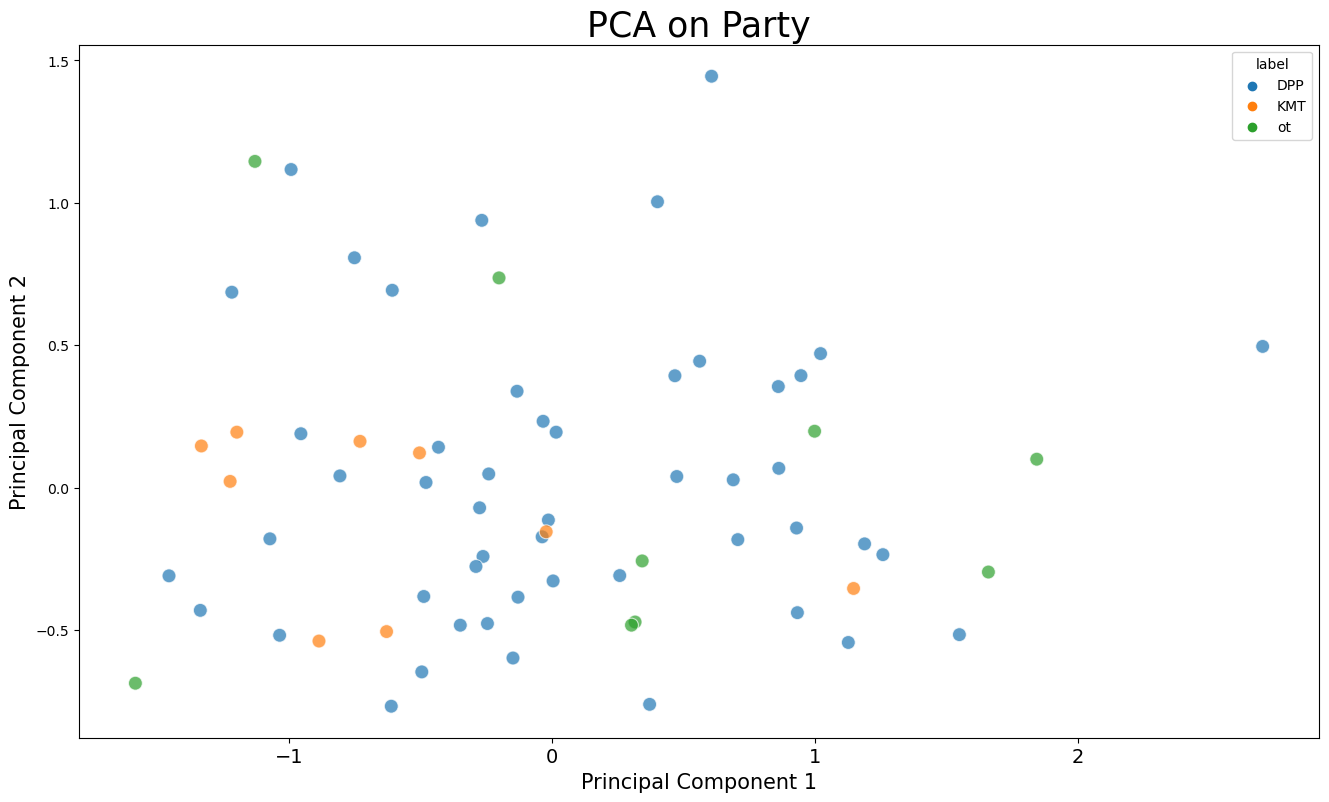

In [5]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Party', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

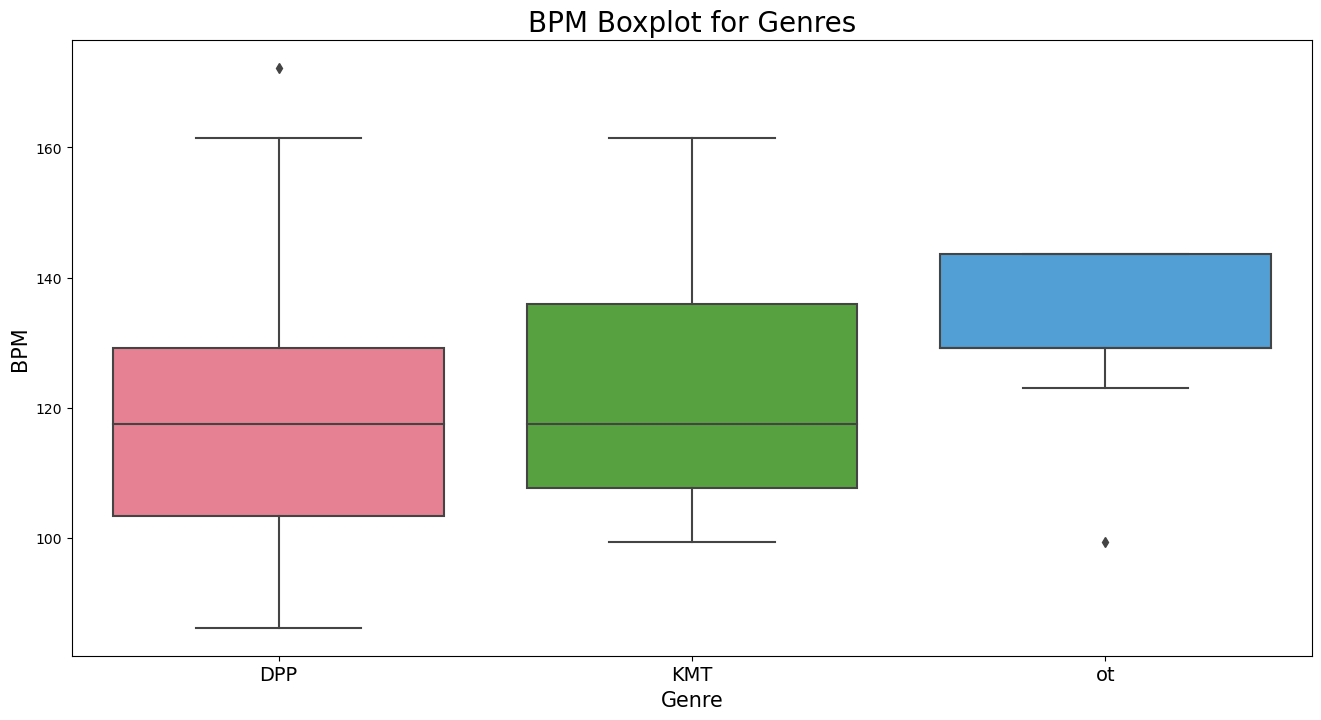

In [15]:
x = data[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

In [12]:
data = pd.read_csv('labeled.csv', engine='python')
data = data.iloc[0:, 1:]
y = data['year']
X = data.loc[:, data.columns != 'label']
X = X.loc[:, X.columns != 'year']
X = X.loc[:, X.columns != 'elected']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.29608327, 0.13473151])

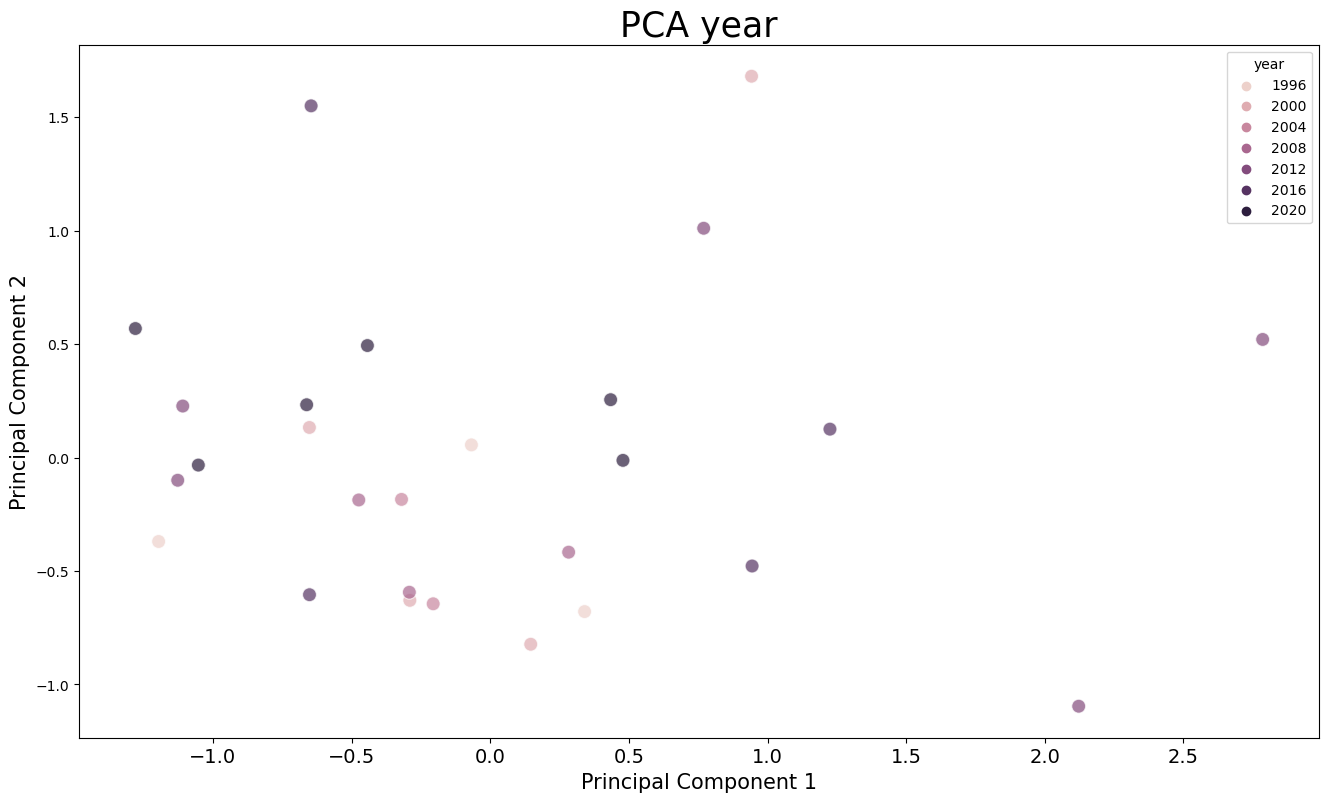

In [13]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "year", alpha = 0.7,
               s = 100);

plt.title('PCA year', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

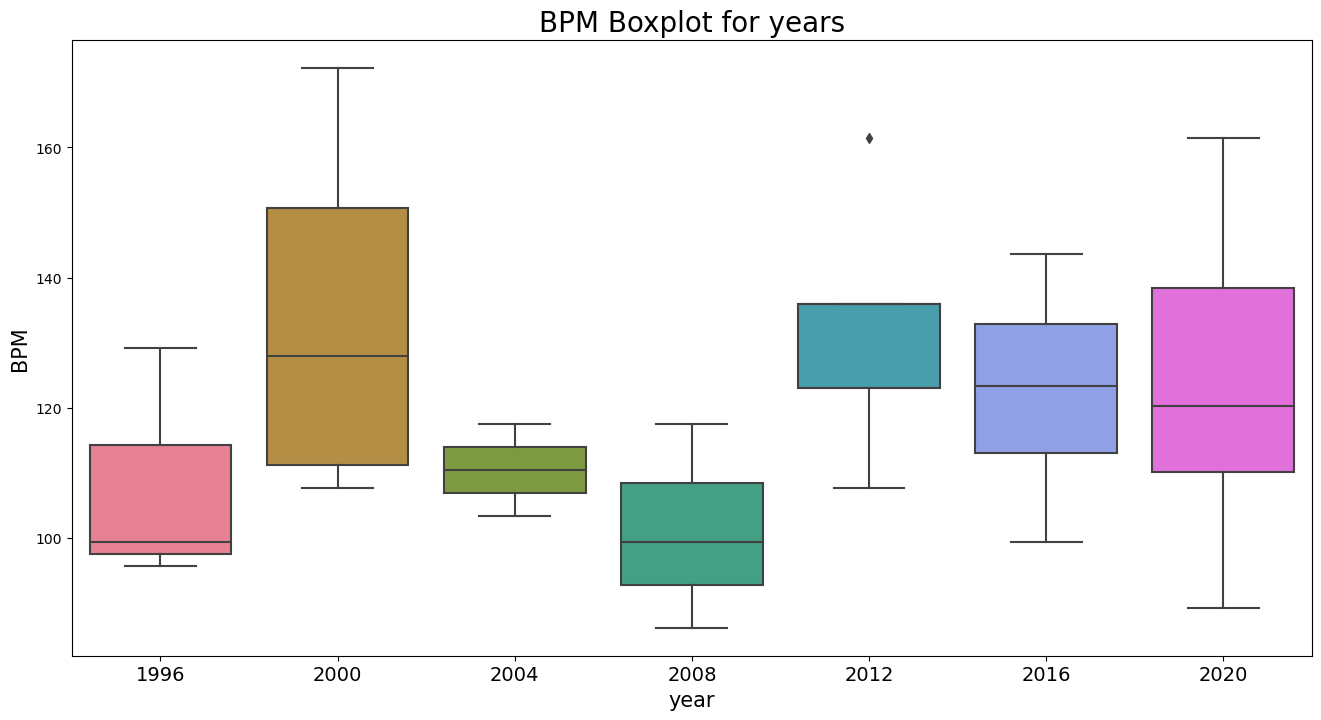

In [14]:
x = data[["year", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "year", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for years', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("year", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

In [15]:
data = pd.read_csv('labeled.csv', engine='python')
data = data.iloc[0:, 1:]
y = data['elected']
X = data.loc[:, data.columns != 'label']
X = X.loc[:, X.columns != 'year']
X = X.loc[:, X.columns != 'elected']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.29608327, 0.13473151])

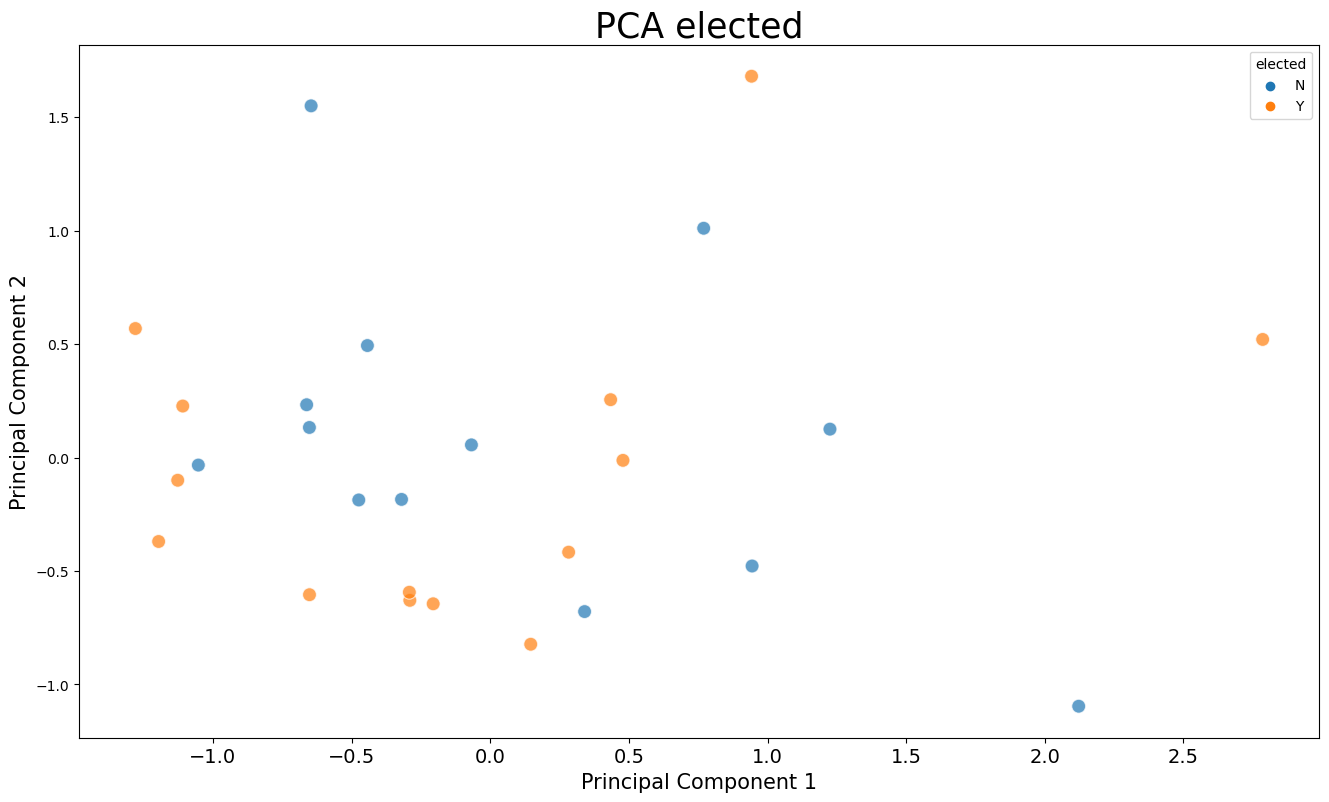

In [17]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "elected", alpha = 0.7,
               s = 100);

plt.title('PCA elected', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

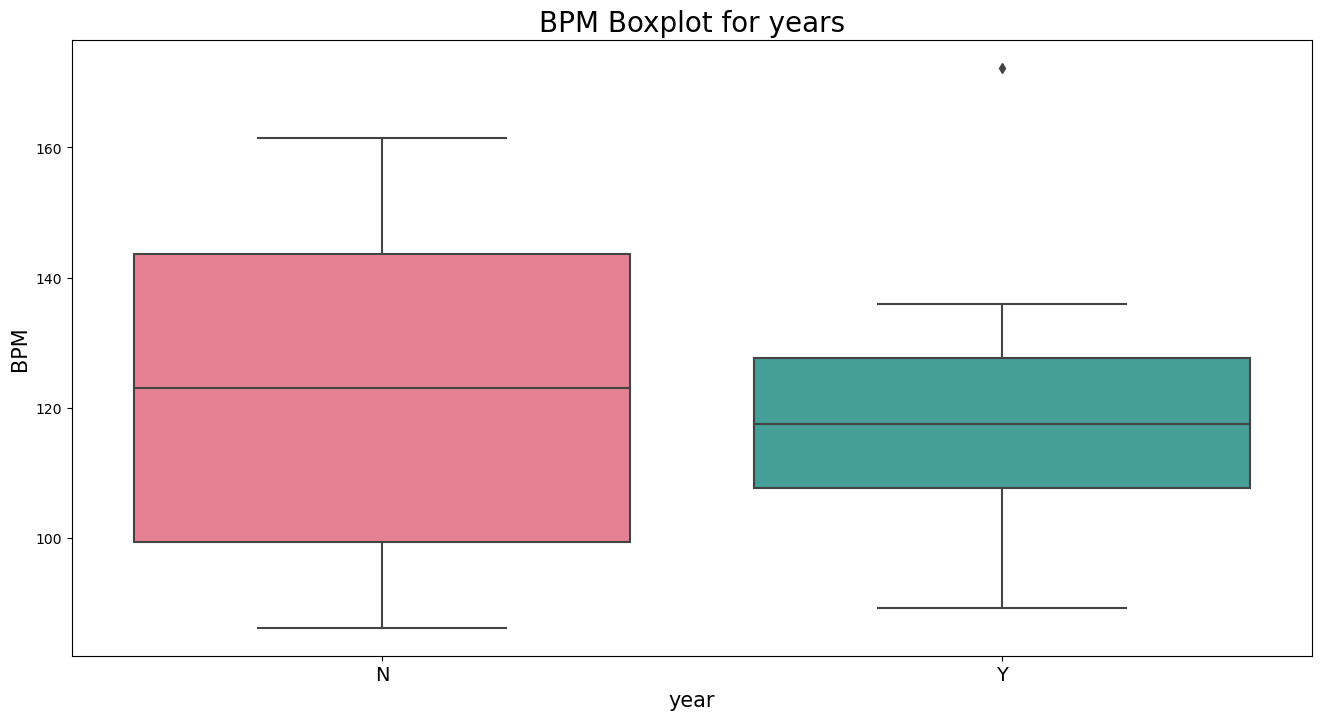

In [19]:
x = data[["elected", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "elected", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for years', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("year", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

In [3]:
file = open('genres2.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = '0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18'.split()
for g in genres:
    for filename in os.listdir(f'TRAIN_V2/ex/{g}'):
        songname = f'TRAIN_V2/ex/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        harm, perc = librosa.effects.hpss(y=y)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        tempo = librosa.beat.tempo(onset_envelope=librosa.onset.onset_strength(y=y, sr=sr), sr=sr)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.var(chroma_stft)} {np.mean(rmse)} {np.var(rmse)} {np.mean(spec_cent)} {np.var(spec_cent)} {np.mean(spec_bw)} {np.var(spec_bw)} {np.mean(rolloff)} {np.var(rolloff)} {np.mean(zcr)} {np.var(zcr)} {np.mean(harm)} {np.var(harm)} {np.mean(perc)} {np.var(perc)} {np.mean(tempo)} '    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
            to_append += f' {np.var(e)}'
        to_append += f' {g}'
        file = open('genres2.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

C:\ProgramData\Anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to estimate tuning from empty frequency set.
  return f(*args, **kwargs)


In [22]:
gens1 = pd.read_csv('genres.csv',nrows=999)

#gens = gens.drop(['filename'],axis=1)
gens1.tail(10)
gens1.to_csv('gen1.csv',index=False, encoding='big5')

In [3]:
gens = pd.read_csv('gen2.csv')
#gens = gens.iloc[999:]
#gens = gens.drop(['filename'],axis=1)
gens.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc_v16,mfcc_m17,mfcc_v17,mfcc_m18,mfcc_v18,mfcc_m19,mfcc_v19,mfcc_m20,mfcc_v20,label
0,0.363976,0.094316,0.158165,0.004529,1397.449236,5.733042e+05,1928.759390,488413.517741,3067.157478,4.496101e+06,...,91.980400,-7.888590,54.247463,2.185705,52.526344,-5.735630,49.951160,-5.137081,74.407883,0
1,0.616947,0.058019,0.225839,0.004596,2222.024977,1.972605e+05,2732.300183,51117.938443,5540.777942,8.689828e+05,...,24.099827,-0.749285,31.302282,5.038293,23.975340,-0.338841,17.641521,5.277034,17.547216,0
2,0.536098,0.076307,0.205273,0.009197,3416.172489,1.531976e+06,2780.560705,356115.709212,6575.062819,4.705213e+06,...,44.790268,-0.547558,46.843739,8.742295,54.484936,-1.570768,47.550011,6.528649,43.876045,0
3,0.276641,0.096369,0.108081,0.001494,1525.928125,1.093302e+06,1657.370655,678510.743335,3263.055869,5.784580e+06,...,280.230225,-7.418976,224.549530,-14.368578,422.995728,-13.031813,158.102524,-18.510021,282.977356,0
4,0.371109,0.095987,0.239208,0.009399,2182.833589,1.166827e+06,2336.106301,622335.560386,4812.053758,5.178807e+06,...,80.321075,-0.984438,62.921432,5.861080,78.323837,3.155840,133.335876,5.113412,145.671890,0


In [6]:
data = pd.read_csv('data.csv', engine='python',encoding='big5')
data = data.loc[:, data.columns != 'label']
data = data.loc[:, data.columns != 'filename']
data.head()
# data = data.loc[:, data.columns != 'elected']

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc_m16,mfcc_v16,mfcc_m17,mfcc_v17,mfcc_m18,mfcc_v18,mfcc_m19,mfcc_v19,mfcc_m20,mfcc_v20
0,0.394348,0.082736,0.187303,0.002636,2027.753336,465728.775376,2384.902182,158256.983352,4609.447127,2.342579e+06,...,5.162564,33.651665,-7.632638,34.398056,4.250960,29.552462,-4.049319,36.560287,7.523615,31.007797
1,0.247862,0.096739,0.065292,0.003625,911.180420,371085.214683,1391.129503,194777.083229,1452.957881,2.008569e+06,...,-8.613462,49.655308,-11.837771,45.339993,-9.123933,67.561691,-9.687928,54.823238,-10.937412,49.034634
2,0.321568,0.086650,0.192275,0.001932,1676.871335,296504.064571,2319.140573,293402.616540,3734.969082,2.874746e+06,...,1.654681,70.394897,-11.104105,71.970177,2.071669,58.193909,-9.968556,61.364613,7.232199,94.498886
3,0.463061,0.072457,0.151951,0.002317,2250.595089,342455.606177,2499.455600,120018.411333,5009.636374,1.899786e+06,...,8.420456,31.409588,-8.140182,37.547031,3.875662,32.698120,-7.621252,35.362053,6.278444,31.491680
4,0.382109,0.088178,0.145296,0.001993,1711.388593,570728.570081,2209.595186,157175.525749,3625.994741,2.229186e+06,...,5.051611,51.880516,-8.220931,53.381664,1.796243,32.394936,-5.985637,47.040806,1.891108,45.603909


In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [40]:
X = gens.loc[:, gens.columns != 'label'] #select all columns but not the labels
genre_list = gens.iloc[:, -1].astype("string")
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
#### NORMALIZE X ####

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [43]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

Accuracy Naive Bayes : 0.2962 

Accuracy Stochastic Gradient Descent : 0.41148 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy KNN : 0.5311 

Accuracy Decission trees : 0.76779 

Accuracy Random Forest : 0.5912 

Accuracy Support Vector Machine : 0.49471 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Logistic Regression : 0.47323 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy Neural Nets : 0.4003 

Accuracy Cross Gradient Booster : 0.82834 

Accuracy Cross Gradient Booster (Random Forest) : 0.53035 



In [44]:
# Final model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [45]:
preds = xgb.predict(data)
preds

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  2, 12, 12, 12, 12,
        2, 12, 12, 12, 12, 12, 12, 12, 12,  2, 12, 12, 12, 12, 12, 12, 12,
       12,  2, 12, 12, 12, 12,  2, 16, 12, 12, 12, 12, 12, 12, 16,  2, 16,
        2, 12, 12, 12, 12, 12,  2, 12, 12,  2,  2, 12, 12, 12, 16, 12, 12],
      dtype=int64)

In [46]:
songs = pd.read_csv('data.csv', engine='python', encoding='big5')
songs['predict'] = preds
songs

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc_m17,mfcc_v17,mfcc_m18,mfcc_v18,mfcc_m19,mfcc_v19,mfcc_m20,mfcc_v20,label,predict
0,NowI'm27.wav,0.394348,0.082736,0.187303,0.002636,2027.753336,465728.775376,2384.902182,158256.983352,4609.447127,...,-7.632638,34.398056,4.250960,29.552462,-4.049319,36.560287,7.523615,31.007797,DPP,12
1,RoundAndRound.wav,0.247862,0.096739,0.065292,0.003625,911.180420,371085.214683,1391.129503,194777.083229,1452.957881,...,-11.837771,45.339993,-9.123933,67.561691,-9.687928,54.823238,-10.937412,49.034634,DPP,12
2,tmiun(編織).wav,0.321568,0.086650,0.192275,0.001932,1676.871335,296504.064571,2319.140573,293402.616540,3734.969082,...,-11.104105,71.970177,2.071669,58.193909,-9.968556,61.364613,7.232199,94.498886,DPP,12
3,世紀之約.wav,0.463061,0.072457,0.151951,0.002317,2250.595089,342455.606177,2499.455600,120018.411333,5009.636374,...,-8.140182,37.547031,3.875662,32.698120,-7.621252,35.362053,6.278444,31.491680,DPP,12
4,亮點.wav,0.382109,0.088178,0.145296,0.001993,1711.388593,570728.570081,2209.595186,157175.525749,3625.994741,...,-8.220931,53.381664,1.796243,32.394936,-5.985637,47.040806,1.891108,45.603909,DPP,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,一起找出路b.wav,0.371531,0.096810,0.033733,0.000476,1215.555317,918289.138431,1715.662772,322570.379945,2351.227449,...,-4.377090,80.849335,3.697409,91.046600,-5.547229,44.301399,-1.980140,62.701855,ot,12
64,人在做天在看.wav,0.350542,0.091004,0.147800,0.007986,2414.633913,867127.594504,2550.535091,204727.305757,5233.351688,...,-4.101485,64.339096,6.529541,107.906784,-4.266273,98.834091,-0.572415,56.423050,ot,12
65,幸福車站.wav,0.278780,0.092934,0.050061,0.001250,1076.132758,626131.507946,1310.664309,343299.282116,2006.321201,...,-9.053709,54.916378,-6.230194,66.308754,-11.385012,86.824219,-7.175885,84.581192,ot,16
66,有你有我.wav,0.395381,0.077377,0.138024,0.000571,2332.630319,88886.257566,2306.186401,26810.269716,4691.521631,...,-6.503997,47.402493,5.557994,32.244972,-6.730798,42.439342,4.933411,76.935127,ot,12


In [47]:
songs.to_csv('pred1.csv',index=False, encoding='big5')

In [44]:
d1 = gens.drop(['label'],axis=1)
allsongs = pd.concat([d1,data])
allsongs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 0 to 67
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   chroma_stft_mean         1067 non-null   float64
 1   chroma_stft_var          1067 non-null   float64
 2   rms_mean                 1067 non-null   float64
 3   rms_var                  1067 non-null   float64
 4   spectral_centroid_mean   1067 non-null   float64
 5   spectral_centroid_var    1067 non-null   float64
 6   spectral_bandwidth_mean  1067 non-null   float64
 7   spectral_bandwidth_var   1067 non-null   float64
 8   rolloff_mean             1067 non-null   float64
 9   rolloff_var              1067 non-null   float64
 10  zero_crossing_rate_mean  1067 non-null   float64
 11  zero_crossing_rate_var   1067 non-null   float64
 12  harmony_mean             1067 non-null   float64
 13  harmony_var              1067 non-null   float64
 14  perc_mean                1

C:\Users\apuser\AppData\Local\Temp\ipykernel_7500\3466055792.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


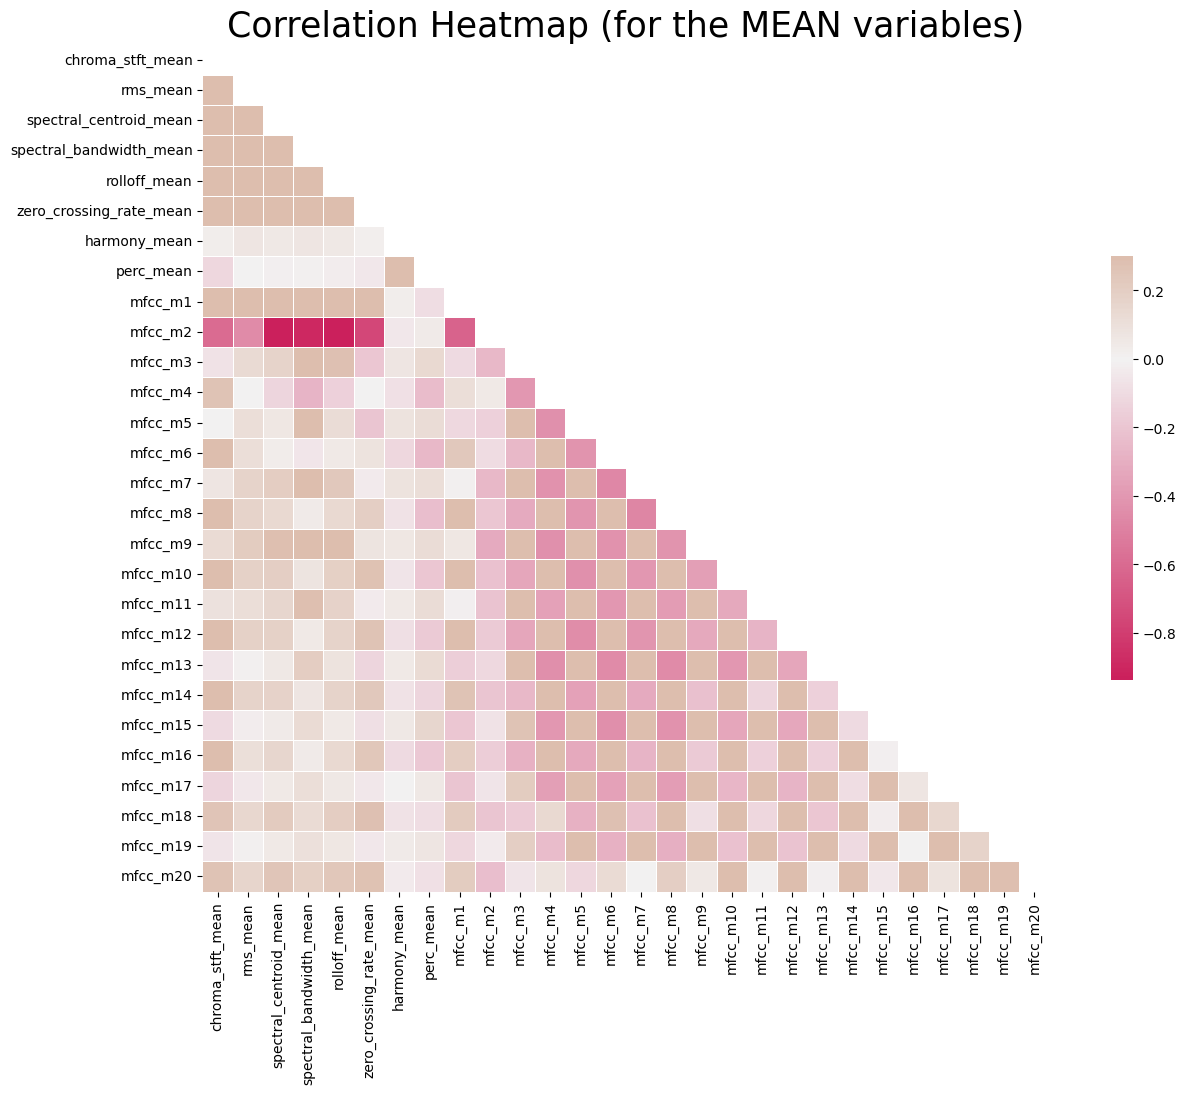

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
# Computing the Correlation Matrix
spike_cols = [col for col in allsongs.columns if '_m' in col]
corr = allsongs[spike_cols].corr()
#corr = allsongs.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

In [46]:
data = data.loc[:, data.columns != 'mfcc_m2']
data.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc_m16,mfcc_v16,mfcc_m17,mfcc_v17,mfcc_m18,mfcc_v18,mfcc_m19,mfcc_v19,mfcc_m20,mfcc_v20
0,0.347527,0.083922,0.200999,0.005114,2102.508171,604781.430354,2330.670377,165881.580118,4585.177656,2.405062e+06,...,5.351213,46.060253,-6.176101,44.659737,5.159507,47.825203,-2.907098,53.972122,6.519960,51.833805
1,0.243416,0.097549,0.057570,0.003240,974.542856,490122.561419,1420.752535,244249.066808,1570.038152,2.359862e+06,...,-9.360292,61.367493,-11.308566,53.505703,-8.089090,75.573616,-9.338662,82.750374,-9.603358,109.112305
2,0.323930,0.085510,0.201016,0.003071,1946.767250,589361.099094,2434.290391,300276.550580,4414.343933,3.511178e+06,...,4.685534,93.663414,-12.204325,61.784332,5.827577,84.063568,-4.779544,69.805893,7.691940,77.456726
3,0.371362,0.090056,0.190435,0.006973,2201.735721,512545.569636,2342.376583,213990.707238,4659.412570,2.366922e+06,...,6.066494,46.919083,-7.872477,52.056503,4.277762,51.524048,-6.572950,59.609989,4.673223,44.731796
4,0.407887,0.083445,0.176255,0.002727,2112.486911,468955.451075,2439.728225,151620.308305,4662.229001,2.352164e+06,...,6.287600,44.259907,-8.849066,40.907902,5.110420,39.165016,-5.096751,48.349346,5.027259,50.460655


In [47]:
gens = gens.loc[:, gens.columns != 'mfcc_m2']
X = gens.loc[:, gens.columns != 'label'] #select all columns but not the labels
genre_list = gens.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
#### NORMALIZE X ####

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
rforest.fit(X, y)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=0)

In [51]:
preds = rforest.predict(data)
preds

array([8, 8, 8, 8, 8, 8, 8, 0, 9, 8, 4, 0, 8, 4, 9, 4, 9, 8, 8, 9, 9, 8,
       9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 9, 9, 9, 8, 8, 8, 9,
       8, 9, 9, 9, 9, 8, 9, 8, 8, 8, 9, 4, 8, 8, 8, 9, 8, 8, 8, 8, 8, 9,
       4, 9])